In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [3]:
np.random.seed(1)
n_row = 1000
orders = pd.DataFrame({"revenue": np.random.randint(0, 4000, n_row)})
display(orders)

,revenue
0,1061
1,235
2,3980
3,1096
4,3839
...,...
995,3175
996,545
997,1119
998,1449


In [11]:
boot_it = 2000
mean_boot_data = []
median_boot_data = []
boot_conf_level = 0.95
for i in range(boot_it):
    samples = orders['revenue'].sample(len(orders['revenue']), replace = True)
    mean_boot_data.append(np.mean(samples))
    median_boot_data.append(np.median(samples))

print(f"""
      Original mean: {np.mean(orders["revenue"])}, Boot mean: {np.mean(mean_boot_data)}
      Original median: {np.median(orders["revenue"])}, Boot median: {np.mean(median_boot_data)}
      """)


      Original mean: 1994.681, Boot mean: 1994.978341
      Original median: 1931.5, Boot median: 1947.697
      


In [14]:
# Найдем доверительный интервал
left_ci = (1 - boot_conf_level)/2
right_ci = 1 - (1 - boot_conf_level) / 2
ci_median = pd.Series(median_boot_data).quantile([left_ci, right_ci])
ci_mean = pd.Series(mean_boot_data).quantile([left_ci, right_ci])

print(f"""
{ci_median}, 
{ci_mean}
""")


0.025    1806.0
0.975    2141.0
dtype: float64, 
0.025    1922.700400
0.975    2065.906775
dtype: float64



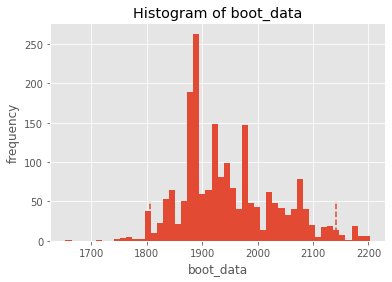

In [16]:
plt.hist(pd.Series(median_boot_data), bins = 50)
plt.style.use('ggplot')
plt.vlines(ci_median,ymin=0,ymax=50,linestyle='--')
plt.xlabel('boot_data')
plt.ylabel('frequency')
plt.title("Histogram of boot_data")
plt.show()